<a href="https://colab.research.google.com/github/nancy280/Next_Gen_Dev/blob/TASK-2/TASK_2_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("./creditcard_2023.csv")
data.head()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


Text(0, 0.5, 'Frequency')

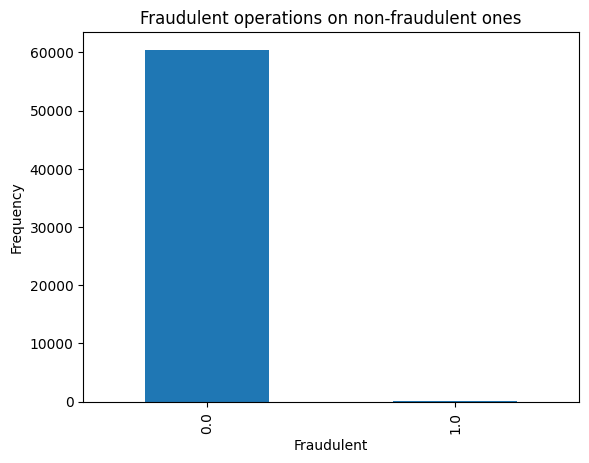

In [ ]:

count_classes = pd.value_counts(data['Class'], sort = False)
count_classes.plot (kind='bar')
plt.title ("Fraudulent operations on non-fraudulent ones")
plt.xlabel ("Fraudulent")
plt.ylabel ("Frequency")


<Axes: ylabel='Frequency'>

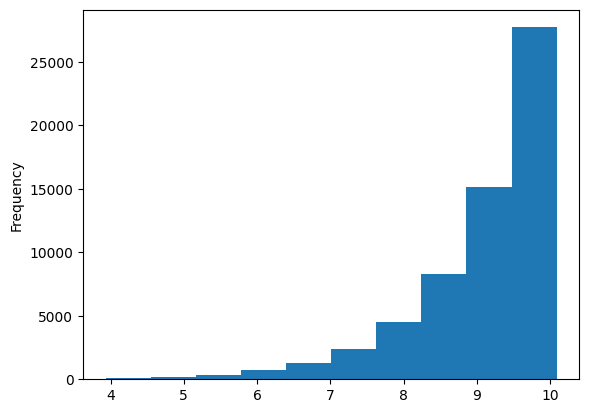

In [ ]:
data['logAmount'] = np.log(data['Amount']+1)
data['logAmount'].sort_values().plot.hist()

In [ ]:
data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,logAmount,normAmount
60615,60615,-0.071614,-0.608079,2.718725,-1.660703,-0.055616,0.367424,0.333554,-0.146427,0.215544,...,-0.215983,-0.205423,-0.104630,2.047438,-0.434043,-0.479779,8125.97,0.0,9.002943,-0.560108
60616,60616,-0.354054,-0.359876,0.288175,-1.640945,0.220019,-0.218431,0.428832,-0.304155,0.086766,...,0.746850,-0.018037,-1.315465,1.575379,0.267935,-0.131053,15827.19,0.0,9.669548,0.551966
60617,60617,-0.119828,-0.059182,1.261676,-0.065192,0.202607,0.342428,0.519161,-0.040076,0.173157,...,-0.100205,0.944403,-0.228256,-0.573755,0.142289,0.199201,11409.41,0.0,9.342281,-0.085972
60618,60618,-0.041209,-0.278838,1.324112,-1.459971,0.291001,0.135603,0.928559,-0.190053,0.374565,...,0.020341,0.049846,-0.605341,1.315534,-0.183455,-0.245536,11637.43,0.0,9.362068,-0.053045
60619,60619,0.171379,-0.418673,1.342649,-1.295335,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['id', 'Amount','logAmount'], axis = 1);


In [ ]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1]);

In [ ]:
number_records_fraud = len (data[data.Class==1])
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

In [ ]:
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])


In [ ]:
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)
y_pred = MLPC.predict(X_test)
recall_acc = recall_score (y_test,y_pred)
recall_acc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9807692307692307